# FINAL PREDICTION FUNCTION

In [4]:
#import required libraries and import build_unet from Custom_UNet_model.py file
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from Custom_UNet_model import build_unet

## 1. Load model

In [27]:
#create the model and load weights of trained model
path = '/content/drive/MyDrive/Colab_Notebooks/DeepGlobeRoadExtraction/weights/U_Net_no_augment/weights-24-0.765.h5'
model_unet = build_unet((256,256,3))
model_unet.load_weights(path)

## 2. Final prediction function

In [33]:
def extract_road_path(model,path):
    
    #preprocess and resize image
    size = 256
    image = cv.imread(path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = cv.resize(image , (size, size))
   
   
    #predict the pixel probability
    predicted_proba = model.predict(image[np.newaxis, :, :, :])
    predict_mask = np.argmax(predicted_proba, axis=-1)

    #Replace 1 with 255 and 0 remains as it is because [0:background, 255:road]
    predict_img = np.where(predict_mask==1,255,0)
    
    #split the channels
    red, green, blue = cv.split(image)
    
    #detecting road path with red colour so red is highlighted and other channels are neutralized
    red = red + predict_img[0]
    red = np.where((red > 255), 255, red)
    
    green = green + predict_img[0]
    green = np.where((green > 255),0, green)

    blue = blue + predict_img[0]
    blue = np.where((blue > 255), 0, blue)
    
    #concat the channels back after red colour is highlighted
    final_prediction = np.dstack((red, green, blue))
   
    #plot the original and predicted image
    plt.figure(figsize=(10, 10))
      
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title('Satellite Image')
    plt.imshow(image)

    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title("Road Path Prediction")
    plt.imshow(final_prediction)
    
    plt.show()

    return None


## 3. Extract Road Path

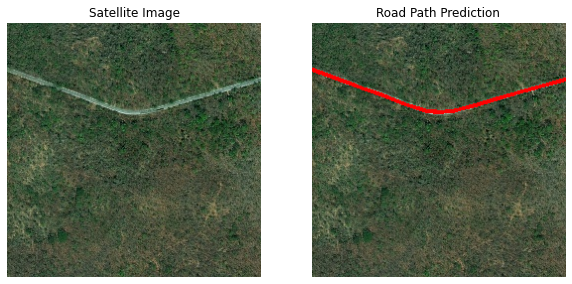

In [36]:
extract_road_path(model = model_unet, path = '/content/drive/MyDrive/Colab_Notebooks/DeepGlobeRoadExtraction/pred_images/101982_sat.jpg')

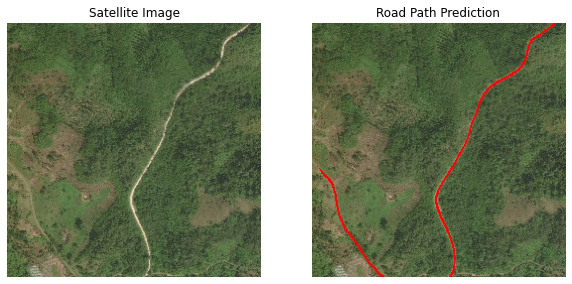

In [37]:
extract_road_path(model = model_unet, path = '/content/drive/MyDrive/Colab_Notebooks/DeepGlobeRoadExtraction/pred_images/100034_sat.jpg')

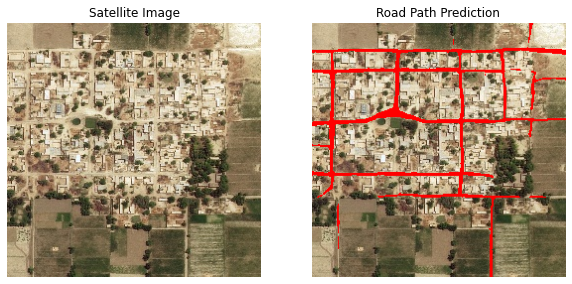

In [38]:
extract_road_path(model = model_unet, path = '/content/drive/MyDrive/Colab_Notebooks/DeepGlobeRoadExtraction/pred_images/100393_sat.jpg')